# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Import API key
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#Only Set to 15
lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-180.000, high=180.000, size=150)
#Only Set to 15
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

101

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities
units = "metric"
api_key = "575be4a8306d0d32bee4173eadc6482c"

In [40]:
# Test for city of London to see if URL and API work
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url_test = f"{base_url}appid={api_key}&units={units}&q=london"
response=requests.get(query_url_test).json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 14.36,
  'pressure': 1013,
  'humidity': 63,
  'temp_min': 11.67,
  'temp_max': 17},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 270},
 'clouds': {'all': 65},
 'dt': 1563493628,
 'sys': {'type': 1,
  'id': 1417,
  'message': 0.0094,
  'country': 'GB',
  'sunrise': 1563509115,
  'sunset': 1563566876},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [41]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 0
set= 1
count= 0

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    
    #used to count to 50 and reset
    if count == 50:
        #sets a sleep period for api
       time.sleep(1.5)
       count = 0
       record = 0
       set+=1
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        #response = requests.get(f"{base_url}&q={city}+{api_key}").json() 
        response = requests.get(f"{base_url}appid={api_key}&units={units}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        # Increase counter by one 
        count += 1
        record += 1
        print(f"Processing Record {record} of Set {set} | {city}")
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
# Log file print statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | oranjemund
Processing Record 4 of Set 1 | sitka
City not found. Skipping...
Processing Record 5 of Set 1 | deep river
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | tigil
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | hopkinton
Processing Record 11 of Set 1 | atyrau
City not found. Skipping...
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | lanzhou
City not found. Skipping...
Processing Record 14 of Set 1 | guangzhou
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | nome
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | codrington
Processing Record 22 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          87
Cloudiness    87
Country       87
Date          87
Humidity      87
Lat           87
Lng           87
Max Temp      87
Wind Speed    87
dtype: int64

In [50]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,99,GL,1563493784,80,77.48,-69.36,5.45,1.67
1,Vaini,99,IN,1563493645,91,15.34,74.49,24.95,1.08
2,Oranjemund,8,ZA,1563493785,90,-28.55,16.43,13.55,0.98
3,Sitka,0,US,1563493785,34,37.17,-99.65,37.78,7.15
4,Deep River,1,CA,1563493785,57,46.10,-77.49,27.22,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

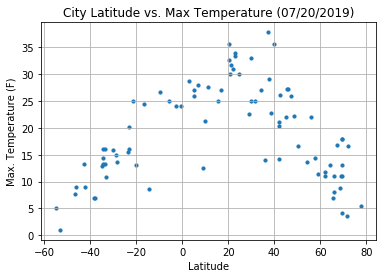

In [51]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (07/20/2019)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

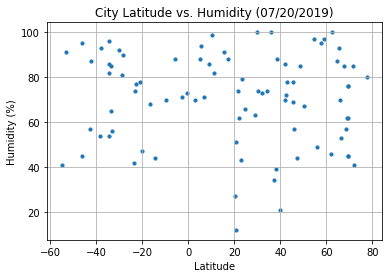

In [52]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/20/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

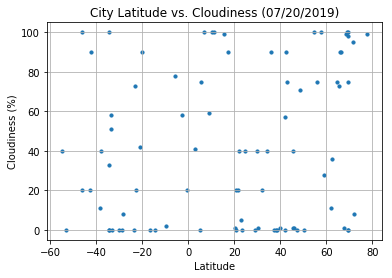

In [53]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (07/20/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

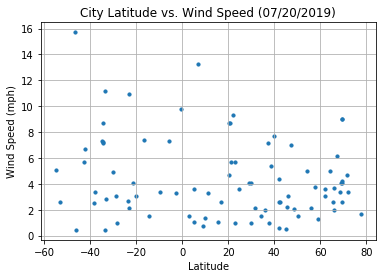

In [54]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (07/20/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()